In [28]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns

In [29]:
train_data = pd.read_csv('../Data/train.csv')
test_data = pd.read_csv('../Data/test.csv')

In [30]:
all_data = pd.concat([train_data,test_data],axis=0)
all_data.shape

(113387, 36)

In [31]:
X = train_data.drop('label',axis=1)
y = train_data['label']
X.shape, y.shape

((28322, 35), (28322,))

Checking Baseline Performance

In [45]:
y.value_counts(normalize=True)

0    0.831933
1    0.168067
Name: label, dtype: float64

In [33]:
X.columns

Index(['id', 'gender', 's11', 's12', 's13', 's16', 's17', 's18', 's48', 's52',
       's53', 's54', 's55', 's56', 's57', 's58', 's59', 's69', 's70', 's71',
       'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11',
       'n12', 'n13', 'n14', 'n15'],
      dtype='object')

In [34]:
X.head()

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,s53,s54,s55,s56,s57,s58,s59,s69,s70,s71,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15
0,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,M,Y,N,1,D,D,B,0,1,,NaN,kK,NaN,NaN,B,NaN,x,op: D,b,16.144666,1.989441,2,2.318385,-32.839277,0.017176,-9.126056,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5
1,b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8F...,M,Y,Y,1,D,D,B,1,1,,NaN,NaN,NaN,NaN,B,NaN,x,op: D,b,7.144558,0.844866,3,6.197768,-32.576597,0.013857,-9.098287,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3
2,b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS...,M,Y,Y,1,D,D,B,0,1,,NaN,NaN,NaN,NaN,B,NaN,x,op: D,b,6.923236,1.042018,6,7.824401,-32.510544,0.013943,-9.234894,1.503828,4.109685,3.953226,1.804260,0,0,0.222537,2
3,b'gAAAAABinOig-g3-Q1ggjlMhfUSdn21Aj5yVVeVvXbis...,F,Y,Y,1,D,D,B,0,1,,NaN,NaN,NaN,NaN,B,NaN,x,op: D,b,5.749840,0.781439,2,8.256767,-32.398679,0.010387,-9.378025,1.485863,7.265876,4.559419,1.537645,0,0,0.154409,4
4,b'gAAAAABinOiXdoaNUzihOSbyY1tjWtd5EgMaXkkvH6SV...,M,N,Y,1,B,D,D,1,l,,NaN,NaN,NaN,NaN,B,NaN,~1,op: D,d,14.771959,1.248188,3,2.300011,-32.396746,0.016289,-9.261962,1.619210,3.737647,4.052003,1.637831,0,1,0.737560,1


In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28322 entries, 0 to 28321
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28322 non-null  object 
 1   gender  28322 non-null  object 
 2   s11     28322 non-null  object 
 3   s12     28322 non-null  object 
 4   s13     28322 non-null  int64  
 5   s16     28322 non-null  object 
 6   s17     28322 non-null  object 
 7   s18     28322 non-null  object 
 8   s48     28322 non-null  int64  
 9   s52     28322 non-null  object 
 10  s53     28322 non-null  object 
 11  s54     2628 non-null   object 
 12  s55     3206 non-null   object 
 13  s56     0 non-null      float64
 14  s57     0 non-null      float64
 15  s58     28322 non-null  object 
 16  s59     0 non-null      float64
 17  s69     28322 non-null  object 
 18  s70     28322 non-null  object 
 19  s71     28322 non-null  object 
 20  n1      28322 non-null  float64
 21  n2      28322 non-null  float64
 22

In [36]:
X.describe()

,s13,s48,s56,s57,s59,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15
count,28322.000000,28322.000000,0.0,0.0,0.0,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000
mean,0.983123,0.433338,NaN,NaN,NaN,10.201863,1.600111,4.805099,5.080537,-32.641183,0.015014,-9.107429,1.612428,5.232644,6.115109,1.699553,0.009992,0.089506,0.497570,2.997740
std,0.128814,0.495545,NaN,NaN,NaN,4.414660,0.664985,2.199282,2.276162,0.241453,0.006550,0.205200,0.173560,2.179705,2.474138,0.115150,0.099462,0.285478,0.289207,2.007611
min,0.000000,0.000000,NaN,NaN,NaN,2.200736,0.311727,0.000000,1.700370,-33.167589,0.000584,-9.517986,1.178469,2.508858,1.173465,1.500006,0.000000,0.000000,0.000101,0.000000
25%,1.000000,0.000000,NaN,NaN,NaN,6.592127,1.013540,3.000000,2.833161,-32.862207,0.009195,-9.258473,1.489924,3.464229,4.414671,1.600056,0.000000,0.000000,0.247801,1.000000
50%,1.000000,0.000000,NaN,NaN,NaN,9.535961,1.462197,5.000000,4.840320,-32.577026,0.016053,-9.174557,1.537263,4.461770,5.317154,1.698556,0.000000,0.000000,0.495255,3.000000
75%,1.000000,1.000000,NaN,NaN,NaN,14.432580,2.194510,6.000000,7.300738,-32.396733,0.018771,-8.964786,1.730249,6.524341,7.027610,1.799238,0.000000,0.000000,0.748786,5.000000
max,1.000000,1.000000,NaN,NaN,NaN,20.882733,3.137331,9.000000,8.594620,-32.289180,0.029992,-8.586583,2.173593,11.214870,12.029135,1.899995,1.000000,1.000000,0.999990,6.000000


In [39]:
X.describe(include='object')

,id,gender,s11,s12,s16,s17,s18,s52,s53,s54,s55,s58,s69,s70,s71
count,28322,28322,28322,28322,28322,28322,28322,28322,28322,2628,3206,28322,28322,28322,28322
unique,28322,2,2,2,4,4,4,4,2,9,9,2,4,4,4
top,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,M,Y,Y,D,D,B,1,,2b,2k,B,x,op: D,b
freq,1,20396,25112,24227,21028,24013,25010,20524,25752,316,405,25760,21028,24013,25010


Just checking whether all ID's are actually unique or not

In [40]:
X['id'].is_unique

True

In [41]:
X.s53.value_counts(normalize=True)

      0.909258
      0.090742
Name: s53, dtype: float64

In [42]:
X.s53.head(10)

0      
1      
2      
3      
4      
5      
6      
7      
8      
9      
Name: s53, dtype: object

In [43]:
X.s53.tail(10)

28312      
28313      
28314      
28315      
28316      
28317      
28318      
28319      
28320      
28321      
Name: s53, dtype: object

In [46]:
X.duplicated(['gender', 's11', 's12', 's13', 's16', 's17', 's18', 's48', 's52',
       's53', 's54', 's55', 's56', 's57', 's58', 's59', 's69', 's70', 's71',
       'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11',
       'n12', 'n13', 'n14', 'n15']).sum()

0

Theres no duplicate observation!

In [47]:
corr = X.corr()

<AxesSubplot:>

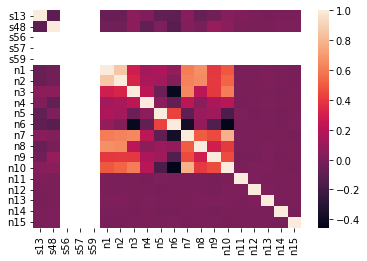

In [48]:
sns.heatmap(corr)